In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

gdp_data = pd.read_csv(r"C:\Users\ATHARVA\OneDrive\Desktop\Real GDP.csv")

gdp_data["Year"] = pd.to_datetime(gdp_data["Quarter"], dayfirst=True)

gdp_data.set_index("Year", inplace=True)

gdp_data = gdp_data.loc["2003-01-01":"2023-12-31"]

cycle_gdp, gdp_n = sm.tsa.filters.hpfilter(gdp_data["Real GDP (million Real)"], lamb=1600)

gdp_data["Output Gap HP"] = ((gdp_data["Real GDP (million Real)"] - gdp_n)/(gdp_n))*100

gdp_yearly = gdp_data.resample("Y").mean()

gdp_yearly.index = gdp_yearly.index.year


plt.figure(figsize=(10, 5))
plt.plot(gdp_yearly.index, gdp_yearly["Output Gap HP"], label="Output Gap", color="purple")
plt.axhline(y=0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.legend()
plt.title("Output Gap (Real GDP - Trend)")
plt.xlabel("Year")
plt.ylabel("Output Gap (million Real)")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


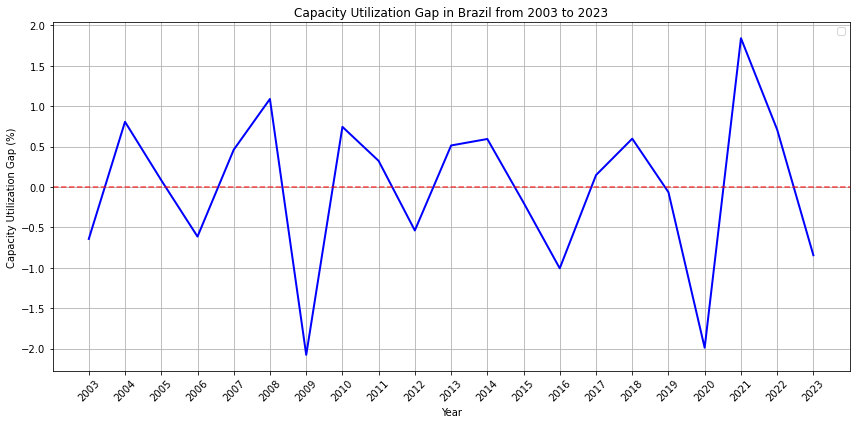

In [493]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

cu_data = pd.read_csv(r"C:\Users\ATHARVA\Downloads\STI-20250326164355021.csv")

cu_data["Date"] = pd.to_datetime(cu_data["Date"], format="%b-%y")
cu_data.set_index("Date", inplace=True)

cu_data = cu_data.loc[cu_data.index.year <= 2023]

cycle_c, Ct_n = sm.tsa.filters.hpfilter(cu_data["Capacity utilization rate"], lamb=14400)  # Lambda = 14400 for monthly data

#c_gap = np.log(cu_data["Capacity utilization rate"] / Ct_n) 
c_gap = ((cu_data["Capacity utilization rate"] - Ct_n ) / Ct_n) * 100

c_gap_yearly = c_gap.resample("Y").mean()
c_gap_yearly.index = c_gap_yearly.index.to_period("Y").to_timestamp(how="start")  # Align to January 1st

c_gap_df = pd.DataFrame({
    "Year": c_gap_yearly.index.year,  # Extract year
    "Capacity Utilization Gap": c_gap_yearly.values
})

plt.figure(figsize=(12, 6))
plt.plot(c_gap_yearly.index, c_gap_yearly, color='blue', linewidth=2)
plt.axhline(0, linestyle="dashed", color="red", alpha=0.7)  # Reference line at 0
plt.xticks(c_gap_yearly.index, labels=c_gap_df["Year"], rotation=45)
plt.xlabel("Year")
plt.ylabel("Capacity Utilization Gap (%)")
plt.title("Capacity Utilization Gap in Brazil from 2003 to 2023")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [499]:
c_gap_df

,Year,Capacity Utilization Gap
0,2003,-0.642794
1,2004,0.806043
2,2005,0.082458
3,2006,-0.614004
4,2007,0.460206
5,2008,1.088385
6,2009,-2.077252
7,2010,0.743682
8,2011,0.322666
9,2012,-0.538273


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


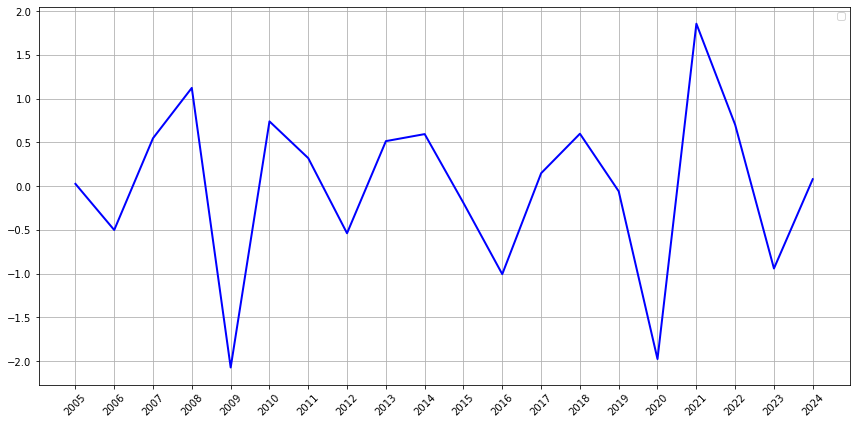

In [383]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

cu_data = pd.read_csv(r"C:\Users\ATHARVA\Downloads\STI-20250326164355021.csv")

cu_data["Date"] = pd.to_datetime(cu_data["Date"], format="%b-%y")
cu_data.set_index("Date", inplace=True)

cu_data = cu_data[(cu_data.index.year >= 2005) & (cu_data.index.year <= 2024)]

cycle_c, Ct_n = sm.tsa.filters.hpfilter(cu_data["Capacity utilization rate"], lamb=14400)  # Lambda = 14400 for monthly data

#c_gap = np.log(cu_data["Capacity utilization rate"] / Ct_n) 
c_gap = ((cu_data["Capacity utilization rate"] - Ct_n ) / Ct_n) * 100

c_gap_yearly = c_gap.resample("Y").mean()
c_gap_yearly.index = c_gap_yearly.index.to_period("Y").to_timestamp(how="start")  # Align to January 1st

c_gap_df = pd.DataFrame({
    "Year": c_gap_yearly.index.year,  # Extract year
    "Capacity Utilization Gap": c_gap_yearly.values
})

plt.figure(figsize=(12, 6))
plt.plot(c_gap_yearly.index, c_gap_yearly, color='blue', linewidth=2)
#plt.axhline(0, linestyle="dashed", color="red", alpha=0.7)  # Reference line at 0
plt.xticks(c_gap_yearly.index, labels=c_gap_df["Year"], rotation=45)
#plt.xlabel("Year")
#plt.ylabel("Capacity Utilization Gap (logged values)")
#plt.title("Capacity Utilization Gap in Brazil from 2003 to 2023 (logged values)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

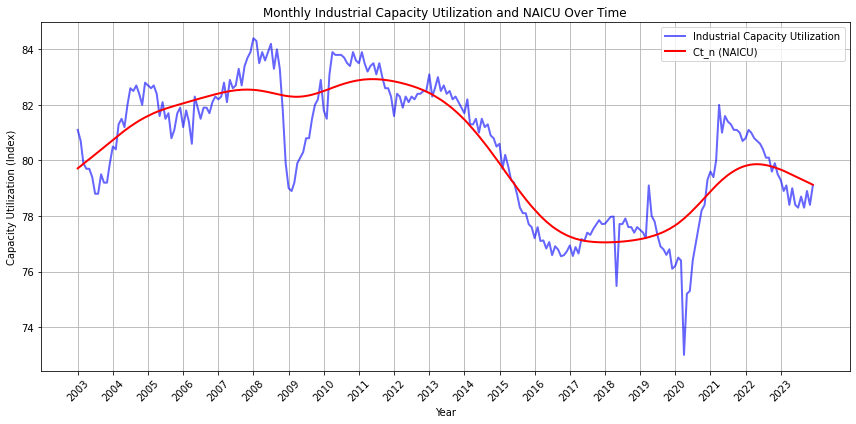

In [495]:
# ✅ Plot capacity utilization gap
plt.figure(figsize=(12, 6))

# Plot actual capacity utilization
plt.plot(Ct_n.index, cu_data["Capacity utilization rate"], label="Industrial Capacity Utilization", color='blue', linewidth=2, alpha=0.6)

# Plot trend (NAICU)
plt.plot(Ct_n.index, Ct_n, label="Ct_n (NAICU)", color='red', linewidth=2)

# Fix x-axis labels: Show only yearly intervals
plt.xticks(cu_data.index[::12], cu_data.index[::12].year, rotation=45)  # Select every 12th month for yearly labels

# Labels and formatting
plt.xlabel("Year")
plt.ylabel("Capacity Utilization (Index)")
plt.title("Monthly Industrial Capacity Utilization and NAICU Over Time")
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

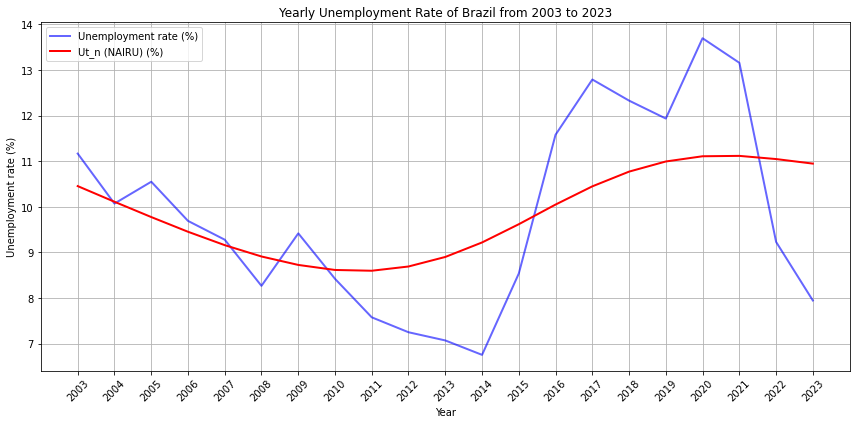

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

u_data = pd.read_csv(r"C:\Users\ATHARVA\OneDrive\Desktop\SSE\Yearly unemployment.csv")

u_data["Year"] = pd.to_datetime(u_data["Year"], format="%Y")
u_data.set_index("Year", inplace=True)

u_data = u_data.loc["2003":"2023"]

cycle, Ut_n = sm.tsa.filters.hpfilter(u_data["Unemployment rate"], lamb=100)  # Adjust lambda for yearly data

#unemployment_gap = np.log((u_data["Unemployment rate"]) / (Ut_n))
unemployment_gap = ((u_data["Unemployment rate"] - Ut_n ) / Ut_n) * 100

u_gap_df = pd.DataFrame({
    "Year": u_data.index.year,
    "Unemployment Gap": unemployment_gap.values
})

plot_dates = u_data.index
plt.figure(figsize=(12, 6))
plt.plot(plot_dates, u_data["Unemployment rate"], label="Unemployment rate (%)", color="blue", linewidth=2, alpha = 0.6)
plt.plot(plot_dates, Ut_n, label="Ut_n (NAIRU) (%)", color="red", linewidth=2)

# Format x-axis with yearly labels
plt.xticks(plot_dates, labels=u_gap_df["Year"], rotation=45)

plt.title("Yearly Unemployment Rate of Brazil from 2003 to 2023")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


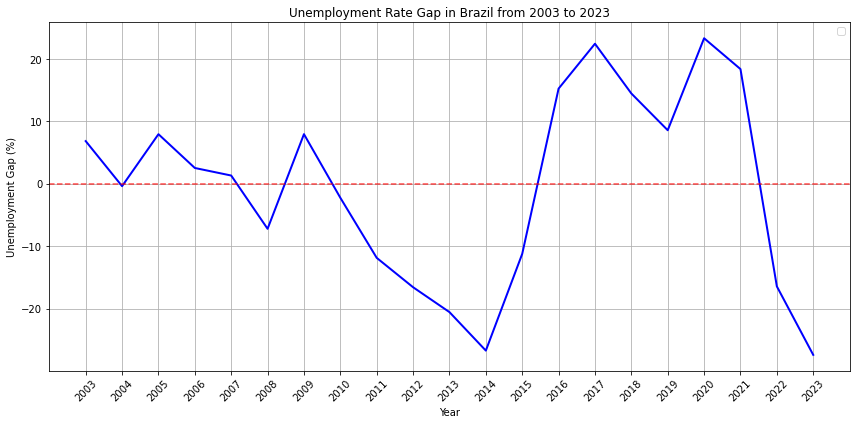

In [497]:
# Create datetime version of years for plotting
plot_dates = u_gap_df.index

# === Plot Results ===
plt.figure(figsize=(12, 6))
plt.plot(plot_dates, unemployment_gap, color="blue", linewidth=2)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)

# Format x-axis with yearly labels
plt.xticks(plot_dates, labels=u_gap_df["Year"], rotation=45)

plt.ylabel("Unemployment Gap (%)")
plt.title("Unemployment Rate Gap in Brazil from 2003 to 2023")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [503]:
merged_df

,Year,Capacity Utilization Gap,Unemployment Gap,Output Gap
0,2003,-0.642794,6.819517,-4.348828
1,2004,0.806043,-0.395661,0.559814
2,2005,0.082458,7.926141,-4.722701
3,2006,-0.614004,2.516254,-1.755354
4,2007,0.460206,1.305300,-0.599098
5,2008,1.088385,-7.225614,4.770723
6,2009,-2.077252,7.933068,-5.590741
7,2010,0.743682,-2.255352,1.650684
8,2011,0.322666,-11.877069,7.255308
9,2012,-0.538273,-16.581966,9.733870


In [501]:
merged_df = c_gap_df.merge(u_gap_df, on='Year')

In [502]:
merged_df["Output Gap"] = 0.4*merged_df["Capacity Utilization Gap"] - 0.6 * merged_df["Unemployment Gap"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


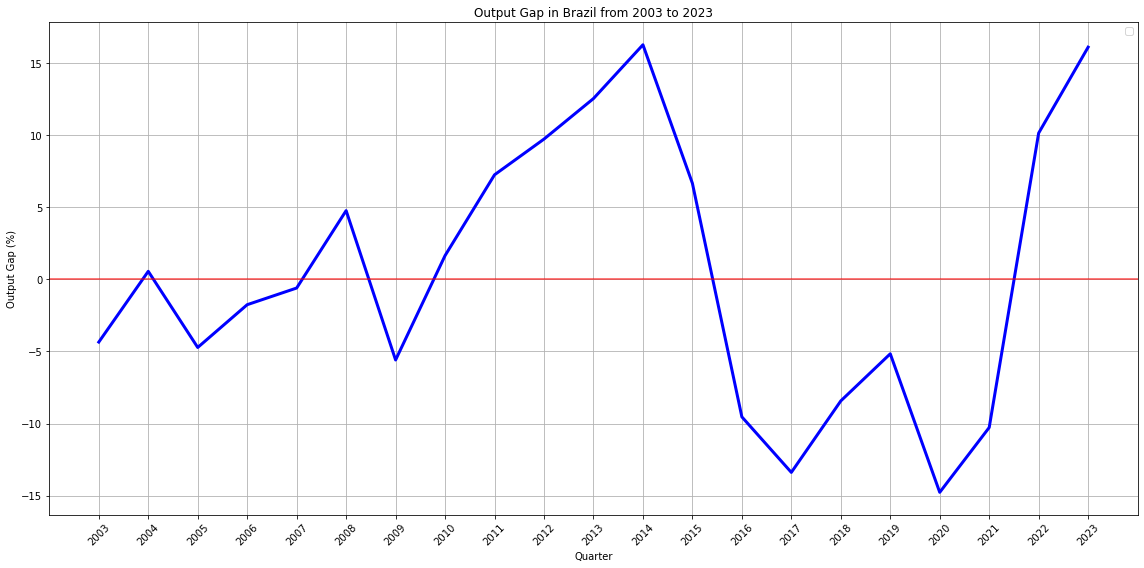

In [504]:
plt.figure(figsize=(16, 8))
plt.plot(merged_df["Year"], merged_df["Output Gap"], color='blue', linewidth=3)
plt.axhline(0, color="red", linestyle="-", alpha=0.7)  # Reference line at 0%
plt.xticks(merged_df["Year"], rotation=45)  # Show every 4th quarter for readability
plt.title("Output Gap in Brazil from 2003 to 2023")
plt.xlabel("Quarter")
plt.ylabel("Output Gap (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

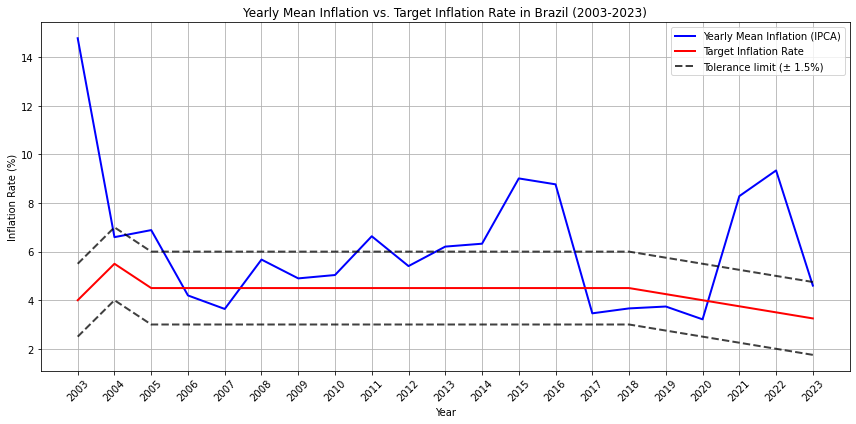

In [506]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_ipca = r"C:\Users\ATHARVA\Downloads\IPCA Inflation.csv"
df_ipca = pd.read_csv(file_path_ipca)

df_ipca["Date"] = pd.to_datetime(df_ipca["Date"], format="%b-%y")
df_ipca.set_index("Date", inplace=True)

df_ipca = df_ipca.loc["2003":"2023"]

inflation_yearly_mean = df_ipca["Inflation (IPCA)"].resample("Y").mean()

inflation_df = pd.DataFrame({
    "Year": inflation_yearly_mean.index.year,
    "Mean Inflation (IPCA)": inflation_yearly_mean.values
})

path_inflation_target = r"C:\Users\ATHARVA\Downloads\STI-20250326172040534.csv"
df_target = pd.read_csv(path_inflation_target)

df_target = df_target[df_target["Year"].between(2003, 2023)]

df_target["Upper Tolerance Limit"] = df_target["Target inflation rate"] + 1.5
df_target["Lower Tolerance Limit"] = df_target["Target inflation rate"] - 1.5

merged_inflation = pd.merge(inflation_df, df_target, on="Year", how="left")

merged_inflation["Inflation Gap"] = merged_inflation["Mean Inflation (IPCA)"] - merged_inflation["Target inflation rate"]

plt.figure(figsize=(12, 6))

plt.plot(merged_inflation["Year"], merged_inflation["Mean Inflation (IPCA)"], 
         label="Yearly Mean Inflation (IPCA)", color="blue", linewidth=2)

plt.plot(merged_inflation["Year"], merged_inflation["Target inflation rate"], 
         label="Target Inflation Rate", color="red", linewidth=2)

plt.plot(merged_inflation["Year"], merged_inflation["Upper Tolerance Limit"], 
         label="Tolerance limit (± 1.5%)", color="black", linestyle="dashed", linewidth=2, alpha = 0.75)

plt.plot(merged_inflation["Year"], merged_inflation["Lower Tolerance Limit"], color="black", linestyle="dashed", linewidth=2, alpha = 0.75)

#plt.plot(merged_inflation["Year"], merged_inflation["Inflation Gap"], color="blue", linewidth=2)

plt.xticks(merged_inflation["Year"], rotation=45)
plt.title("Yearly Mean Inflation vs. Target Inflation Rate in Brazil (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


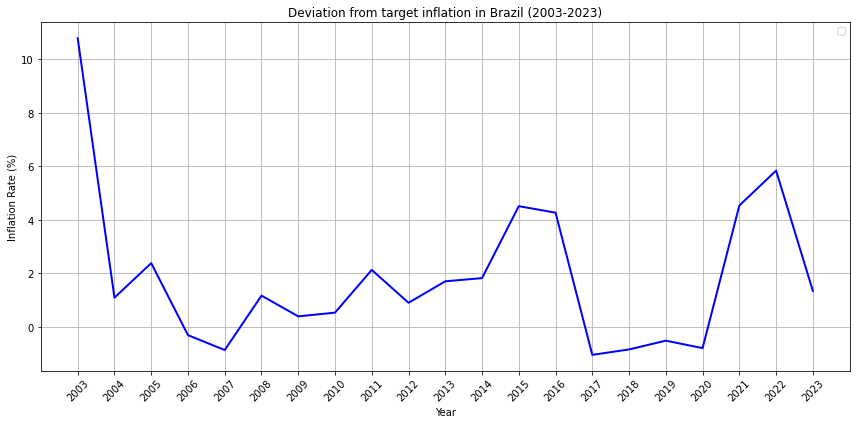

In [507]:
plt.figure(figsize=(12, 6))
plt.plot(merged_inflation["Year"], merged_inflation["Inflation Gap"], color="blue", linewidth=2)

# Format plot
plt.xticks(merged_inflation["Year"], rotation=45)
plt.title("Deviation from target inflation in Brazil (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

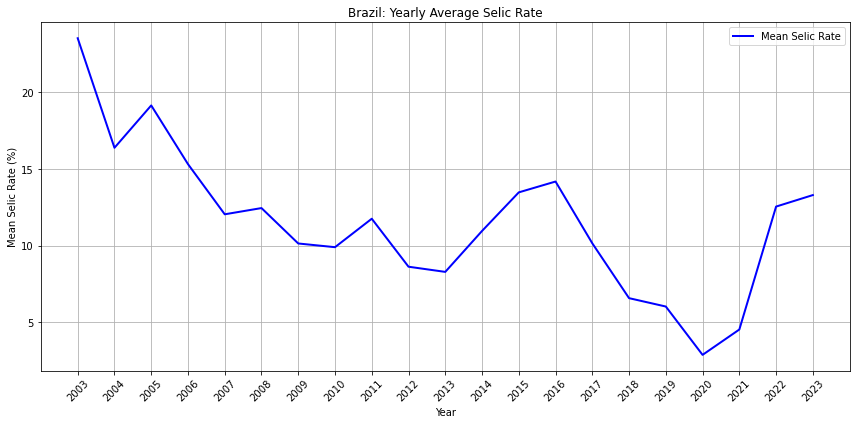

In [508]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_selic = r"C:\Users\ATHARVA\Downloads\STI-20250326162121140.csv"
df_selic = pd.read_csv(file_path_selic)

df_selic["Date"] = pd.to_datetime(df_selic["Date"], format="%d-%m-%Y")  # Adjust format if needed
df_selic.set_index("Date", inplace=True)

selic_yearly_mean = df_selic["Selic rate"].resample("Y").mean()

selic_df = pd.DataFrame({
    "Year": selic_yearly_mean.index.year,
    "Mean Selic Rate": selic_yearly_mean.values
})

selic_df = selic_df[(selic_df["Year"] >= 2003) & (selic_df["Year"] <= 2023)]

plt.figure(figsize=(12, 6))
plt.plot(selic_df["Year"], selic_df["Mean Selic Rate"], linestyle="-", color="blue", linewidth=2, label="Mean Selic Rate")
plt.xticks(selic_df["Year"], rotation=45)
plt.title("Brazil: Yearly Average Selic Rate")
plt.xlabel("Year")
plt.ylabel("Mean Selic Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [509]:
del final_df

In [512]:
final_df

,Year,Capacity Utilization Gap,Unemployment Gap,Output Gap,Mean Inflation (IPCA),Target inflation rate,Upper Tolerance Limit,Lower Tolerance Limit,Inflation Gap,Mean Selic Rate
0,2003,-0.642794,6.819517,-4.348828,14.784167,4.00,5.50,2.50,10.784167,23.515068
1,2004,0.806043,-0.395661,0.559814,6.595833,5.50,7.00,4.00,1.095833,16.377732
2,2005,0.082458,7.926141,-4.722701,6.885833,4.50,6.00,3.00,2.385833,19.137671
3,2006,-0.614004,2.516254,-1.755354,4.195833,4.50,6.00,3.00,-0.304167,15.313699
4,2007,0.460206,1.305300,-0.599098,3.640000,4.50,6.00,3.00,-0.860000,12.044521
5,2008,1.088385,-7.225614,4.770723,5.672500,4.50,6.00,3.00,1.172500,12.450137
6,2009,-2.077252,7.933068,-5.590741,4.898333,4.50,6.00,3.00,0.398333,10.143151
7,2010,0.743682,-2.255352,1.650684,5.036667,4.50,6.00,3.00,0.536667,9.902055
8,2011,0.322666,-11.877069,7.255308,6.632500,4.50,6.00,3.00,2.132500,11.756164
9,2012,-0.538273,-16.581966,9.733870,5.405000,4.50,6.00,3.00,0.905000,8.629781


In [511]:
final_df = merged_df.merge(merged_inflation, on="Year", how="inner") \
                     .merge(selic_df, on="Year", how="inner")

In [657]:
final_df["Estimated Taylor Rule"] = (
    5 + final_df["Mean Inflation (IPCA)"] + 1.2*final_df["Inflation Gap"] + 0.5*final_df["Output Gap"])

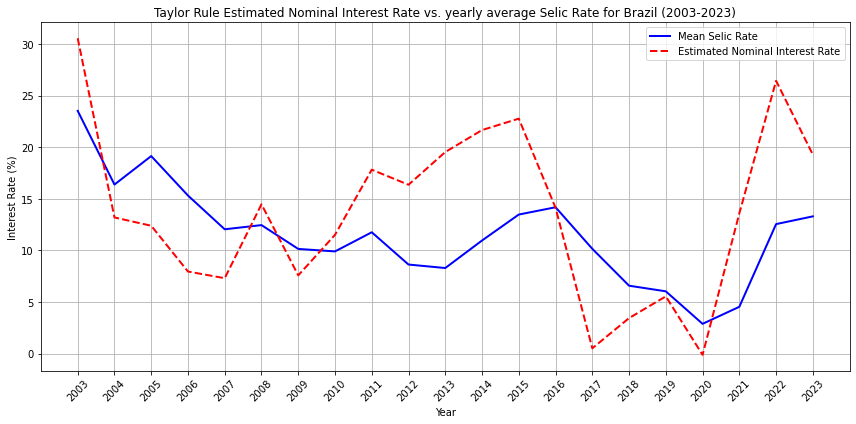

In [658]:
plt.figure(figsize=(12, 6))
plt.plot(final_df["Year"], final_df["Mean Selic Rate"], linestyle="-", color="blue", linewidth=2, label="Mean Selic Rate")
plt.plot(final_df["Year"], final_df["Estimated Taylor Rule"], linestyle="--", color="red", linewidth=2, label="Estimated Nominal Interest Rate")
#plt.plot(final_df["Year"], final_df["Inflation Gap"], linestyle=":", color="green", linewidth=2, label="Inflation Gap")
plt.xticks(final_df["Year"], rotation=45)
plt.title("Taylor Rule Estimated Nominal Interest Rate vs. yearly average Selic Rate for Brazil (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [515]:
import scipy.stats as stats

correlation, _ = stats.pearsonr(final_df["Estimated Taylor Rule"], final_df["Mean Selic Rate"])
print(f"Correlation between Taylor Rule and Selic Rate: {correlation:.2f}")

Correlation between Taylor Rule and Selic Rate: 0.54


In [516]:
import statsmodels.api as sm

X = final_df["Estimated Taylor Rule"]
y = final_df["Mean Selic Rate"]

X = sm.add_constant(X)  # Adds intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Mean Selic Rate   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.795
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0116
Time:                        21:31:08   Log-Likelihood:                -58.585
No. Observations:                  21   AIC:                             121.2
Df Residuals:                      19   BIC:                             123.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.22

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


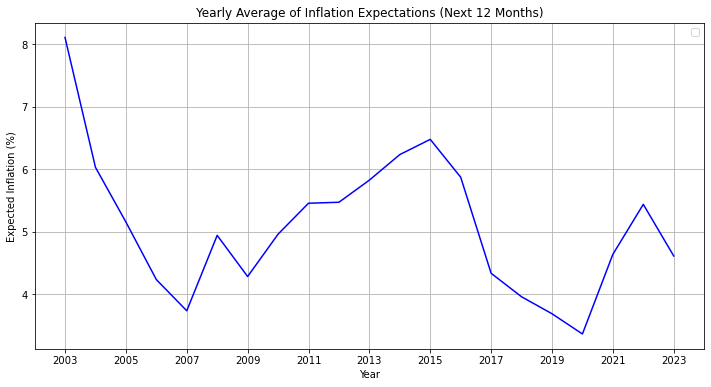

In [655]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\ATHARVA\Downloads\Expectativas de Mercado para inflação nos próximos 12 meses - Estatísticas.csv"
expectations_data = pd.read_csv(file_path)

# Convert "Data" column to datetime format
expectations_data["Data"] = pd.to_datetime(expectations_data["Data"], format="%d-%m-%Y", errors="coerce")

# Extract year
expectations_data["Year"] = expectations_data["Data"].dt.year

# Convert expectations to numeric
expectations_data["Expectations"] = pd.to_numeric(expectations_data["Expectations"], errors="coerce")

# Calculate yearly average
yearly_avg_expectations = expectations_data.groupby("Year")["Expectations"].mean().reset_index()

# **Limit data to 2004–2024**
yearly_avg_expectations = yearly_avg_expectations[(yearly_avg_expectations["Year"] >= 2003) & 
                                                  (yearly_avg_expectations["Year"] <= 2023)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_expectations["Year"], yearly_avg_expectations["Expectations"], linestyle="-", color="blue")

# Formatting
plt.title("Yearly Average of Inflation Expectations (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Expected Inflation (%)")

# Set x-axis ticks to show every 2 years
plt.xticks(yearly_avg_expectations["Year"][::2])

plt.legend()
plt.grid(True)
plt.show()

In [652]:
yearly_avg_expectations

,Year,Expectations
2,2003,8.107760
3,2004,6.030645
4,2005,5.155697
5,2006,4.234779
6,2007,3.735160
7,2008,4.941890
8,2009,4.283040
9,2010,4.960837
10,2011,5.455697
11,2012,5.471394


In [627]:
path_inflation_target = r"C:\Users\ATHARVA\Downloads\STI-20250326172040534.csv"
df_target = pd.read_csv(path_inflation_target)

df_target = df_target[df_target["Year"].between(2003, 2023)]

merged_inflation = pd.merge(yearly_avg_expectations, df_target, on="Year", how="right")

merged_inflation["Inflation Gap"] = merged_inflation["Expectations"] - merged_inflation["Target inflation rate"]

In [628]:
merged_inflation

,Year,Expectations,Target inflation rate,Inflation Gap
0,2003,8.107760,4.00,4.107760
1,2004,6.030645,5.50,0.530645
2,2005,5.155697,4.50,0.655697
3,2006,4.234779,4.50,-0.265221
4,2007,3.735160,4.50,-0.764840
5,2008,4.941890,4.50,0.441890
6,2009,4.283040,4.50,-0.216960
7,2010,4.960837,4.50,0.460837
8,2011,5.455697,4.50,0.955697
9,2012,5.471394,4.50,0.971394


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


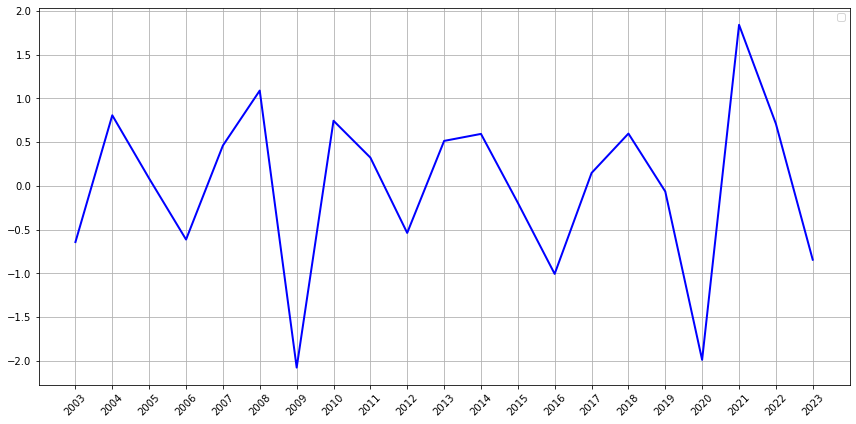

In [629]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

cu_data = pd.read_csv(r"C:\Users\ATHARVA\Downloads\STI-20250326164355021.csv")

cu_data["Date"] = pd.to_datetime(cu_data["Date"], format="%b-%y")
cu_data.set_index("Date", inplace=True)

cu_data = cu_data[(cu_data.index.year >= 2003) & (cu_data.index.year <= 2023)]

cycle_c, Ct_n = sm.tsa.filters.hpfilter(cu_data["Capacity utilization rate"], lamb=14400)  # Lambda = 14400 for monthly data

#c_gap = np.log(cu_data["Capacity utilization rate"] / Ct_n) 
c_gap = ((cu_data["Capacity utilization rate"] - Ct_n ) / Ct_n) * 100

c_gap_yearly = c_gap.resample("Y").mean()
c_gap_yearly.index = c_gap_yearly.index.to_period("Y").to_timestamp(how="start")  # Align to January 1st

c_gap_df = pd.DataFrame({
    "Year": c_gap_yearly.index.year,  # Extract year
    "Capacity Utilization Gap": c_gap_yearly.values
})

plt.figure(figsize=(12, 6))
plt.plot(c_gap_yearly.index, c_gap_yearly, color='blue', linewidth=2)
#plt.axhline(0, linestyle="dashed", color="red", alpha=0.7)  # Reference line at 0
plt.xticks(c_gap_yearly.index, labels=c_gap_df["Year"], rotation=45)
#plt.xlabel("Year")
#plt.ylabel("Capacity Utilization Gap (logged values)")
#plt.title("Capacity Utilization Gap in Brazil from 2003 to 2023 (logged values)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


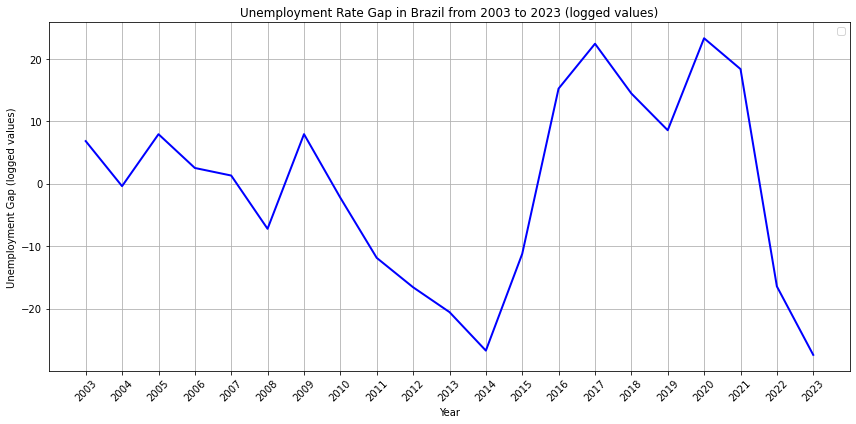

In [630]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

u_data = pd.read_csv(r"C:\Users\ATHARVA\OneDrive\Desktop\Yearly unemployment.csv")

u_data["Year"] = pd.to_datetime(u_data["Year"], format="%Y")
u_data.set_index("Year", inplace=True)

u_data = u_data.loc["2003":"2023"]

cycle, Ut_n = sm.tsa.filters.hpfilter(u_data["Unemployment rate"], lamb=100)  # Adjust lambda for yearly data

#unemployment_gap = np.log((u_data["Unemployment rate"]) / (Ut_n))
unemployment_gap = ((u_data["Unemployment rate"] - Ut_n ) / Ut_n) * 100

u_gap_df = pd.DataFrame({
    "Year": u_data.index.year,
    "Unemployment Gap": unemployment_gap.values
})

plot_dates = u_data.index

plt.figure(figsize=(12, 6))
plt.plot(plot_dates, unemployment_gap, color="blue", linewidth=2)
#plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xticks(plot_dates, labels=u_gap_df["Year"], rotation=45)
plt.ylabel("Unemployment Gap (logged values)")
plt.title("Unemployment Rate Gap in Brazil from 2003 to 2023 (logged values)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

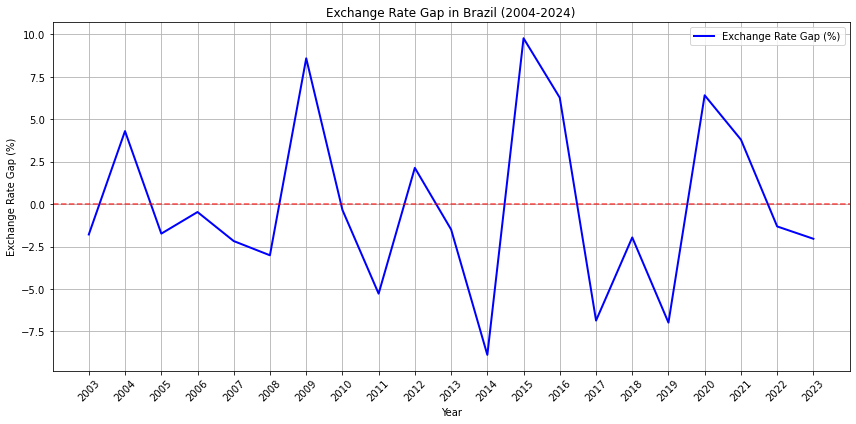

In [631]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\ATHARVA\Downloads\STI-20250330131232936.csv"
er_data = pd.read_csv(file_path)

# Convert Date column to datetime format
er_data["Date"] = pd.to_datetime(er_data["Date"], format="%b-%y")
er_data.set_index("Date", inplace=True)

# Restrict data to 2004-2024
er_data = er_data.loc[(er_data.index.year >= 2003) & (er_data.index.year <= 2023)]

# Apply HP filter to extract trend (lambda=14400 for monthly data)
cycle_e, Et_n = sm.tsa.filters.hpfilter(er_data["USD/BRL"], lamb=14400)

# Calculate exchange rate gap (percentage deviation from trend)
er_gap = ((er_data["USD/BRL"] - Et_n)/(Et_n))*100

# Resample to yearly average
er_gap_yearly = er_gap.resample("Y").mean()
er_gap_yearly.index = er_gap_yearly.index.to_period("Y").to_timestamp(how="start")  # Align to January 1st

# Store in DataFrame
er_data_df = pd.DataFrame({
    "Year": er_gap_yearly.index.year,
    "Exchange Rate Gap (%)": er_gap_yearly.values
})

# Plot the exchange rate gap
plt.figure(figsize=(12, 6))
plt.plot(er_gap_yearly.index, er_gap_yearly, color='blue', linewidth=2, label="Exchange Rate Gap (%)")
plt.axhline(0, linestyle="dashed", color="red", alpha=0.7)  # Reference line at 0
plt.xticks(er_gap_yearly.index, labels=er_data_df["Year"], rotation=45)
plt.xlabel("Year")
plt.ylabel("Exchange Rate Gap (%)")
plt.title("Exchange Rate Gap in Brazil (2004-2024)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [632]:
merged_df = c_gap_df.merge(u_gap_df, on='Year')

In [633]:
merged_df["Output Gap"] = 0.4*merged_df["Capacity Utilization Gap"] - 0.6 * merged_df["Unemployment Gap"]

In [634]:
merged_df

,Year,Capacity Utilization Gap,Unemployment Gap,Output Gap
0,2003,-0.642794,6.819517,-4.348828
1,2004,0.806043,-0.395661,0.559814
2,2005,0.082458,7.926141,-4.722701
3,2006,-0.614004,2.516254,-1.755354
4,2007,0.460206,1.305300,-0.599098
5,2008,1.088385,-7.225614,4.770723
6,2009,-2.077252,7.933068,-5.590741
7,2010,0.743682,-2.255352,1.650684
8,2011,0.322666,-11.877069,7.255308
9,2012,-0.538273,-16.581966,9.733870


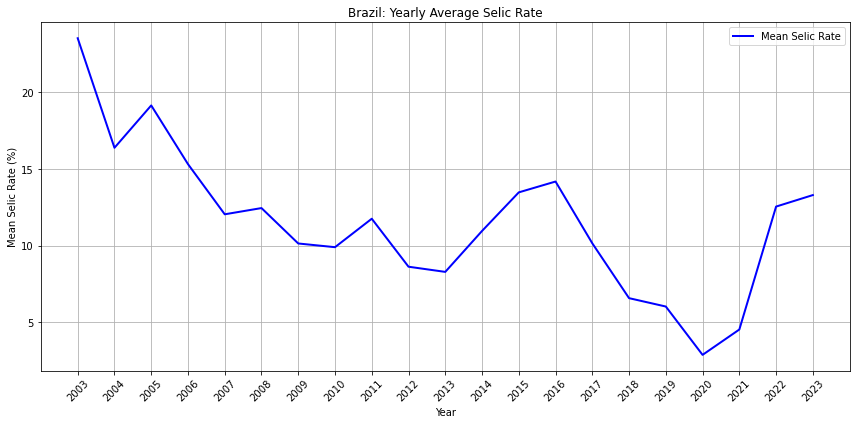

In [635]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_selic = r"C:\Users\ATHARVA\Downloads\STI-20250326162121140.csv"
df_selic = pd.read_csv(file_path_selic)

df_selic["Date"] = pd.to_datetime(df_selic["Date"], format="%d-%m-%Y")  # Adjust format if needed
df_selic.set_index("Date", inplace=True)

selic_yearly_mean = df_selic["Selic rate"].resample("Y").mean()

selic_df = pd.DataFrame({
    "Year": selic_yearly_mean.index.year,
    "Mean Selic Rate": selic_yearly_mean.values
})

selic_df = selic_df[(selic_df["Year"] >= 2003) & (selic_df["Year"] <= 2023)]

plt.figure(figsize=(12, 6))
plt.plot(selic_df["Year"], selic_df["Mean Selic Rate"], linestyle="-", color="blue", linewidth=2, label="Mean Selic Rate")
plt.xticks(selic_df["Year"], rotation=45)
plt.title("Brazil: Yearly Average Selic Rate")
plt.xlabel("Year")
plt.ylabel("Mean Selic Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [636]:
final_df2 = merged_inflation.merge(er_data_df, on="Year", how="left") \
                     .merge(selic_df, on="Year", how="left") \
                     .merge(merged_df, on="Year", how="left")

In [637]:
final_df2

,Year,Expectations,Target inflation rate,Inflation Gap,Exchange Rate Gap (%),Mean Selic Rate,Capacity Utilization Gap,Unemployment Gap,Output Gap
0,2003,8.107760,4.00,4.107760,-1.788411,23.515068,-0.642794,6.819517,-4.348828
1,2004,6.030645,5.50,0.530645,4.302204,16.377732,0.806043,-0.395661,0.559814
2,2005,5.155697,4.50,0.655697,-1.737791,19.137671,0.082458,7.926141,-4.722701
3,2006,4.234779,4.50,-0.265221,-0.465229,15.313699,-0.614004,2.516254,-1.755354
4,2007,3.735160,4.50,-0.764840,-2.175732,12.044521,0.460206,1.305300,-0.599098
5,2008,4.941890,4.50,0.441890,-3.013660,12.450137,1.088385,-7.225614,4.770723
6,2009,4.283040,4.50,-0.216960,8.590008,10.143151,-2.077252,7.933068,-5.590741
7,2010,4.960837,4.50,0.460837,-0.340429,9.902055,0.743682,-2.255352,1.650684
8,2011,5.455697,4.50,0.955697,-5.273971,11.756164,0.322666,-11.877069,7.255308
9,2012,5.471394,4.50,0.971394,2.137248,8.629781,-0.538273,-16.581966,9.733870


In [650]:
final_df2["Estimated Taylor Rule"] = (
    3 + final_df2["Expectations"] + 1.2*final_df2["Inflation Gap"] + 0.5*final_df2["Output Gap"] )

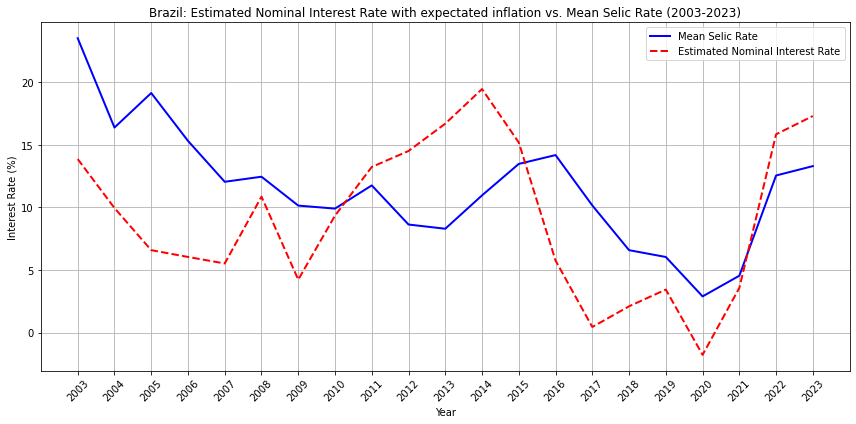

In [656]:
plt.figure(figsize=(12, 6))
plt.plot(final_df2["Year"], final_df2["Mean Selic Rate"], linestyle="-", color="blue", linewidth=2, label="Mean Selic Rate")
plt.plot(final_df2["Year"], final_df2["Estimated Taylor Rule"], linestyle="--", color="red", linewidth=2, label="Estimated Nominal Interest Rate")
#plt.plot(final_df["Year"], final_df["Inflation Gap"], linestyle=":", color="green", linewidth=2, label="Inflation Gap")
plt.xticks(final_df["Year"], rotation=45)
plt.title("Brazil: Estimated Nominal Interest Rate with expectated inflation vs. Mean Selic Rate (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [648]:
import scipy.stats as stats

correlation, _ = stats.pearsonr(final_df2["Estimated Taylor Rule"], final_df2["Mean Selic Rate"])
print(f"Correlation between Taylor Rule and Selic Rate: {correlation:.2f}")

Correlation between Taylor Rule and Selic Rate: 0.38


In [649]:
import statsmodels.api as sm

X = final_df2["Estimated Taylor Rule"]
y = final_df2["Mean Selic Rate"]

X = sm.add_constant(X)  # Adds intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Mean Selic Rate   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.288
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0856
Time:                        22:17:13   Log-Likelihood:                -60.519
No. Observations:                  21   AIC:                             125.0
Df Residuals:                      19   BIC:                             127.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.75